In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [17]:
# Libraries to import so I can find important features
# from sklearn.datasets import make_classification
# from sklearn.ensemble import ExtraTreesClassifier

In [18]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv('LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


# DON'T RUN THIS- IT WILL CRASH THE KERNEL

In [5]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


# Well that right there is what's called a problem. Some of these have over a hundred thousand distinct types. Lets drop the ones with over 30 unique values, converting to numeric where it makes sense

In [19]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [7]:
# id to numeric
# int_rate to numeric
# drop everything listed

In [8]:
y2015.tail()
# the ids should all be integers

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [10]:
# REVIEW: Data cleanup allowed get_dummies to work

In [11]:
# pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Look for feature importances parameters

In [ ]:
# Run the RF model again, it should work
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
# X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [22]:
X.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'n

In [21]:
rfc.fit(X,Y)
cross_val_score(rfc, X, Y, cv=10)

ValueError: could not convert string to float: 'INDIVIDUAL'

In [ ]:
# start: 10:15 am
# end: 10:22 am

# will give a list of numbers, x.columns, look at features and see which are important

In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [1]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

NameError: name 'pd' is not defined

In [70]:
import pandas as pd
feature_importances = rfc.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

AttributeError: 'RandomForestClassifier' object has no attribute 'DataFrame'

Feature ranking:
1. feature 16 (0.184395)
2. feature 24 (0.120811)
3. feature 15 (0.079757)
4. feature 166 (0.079715)
5. feature 151 (0.076947)
6. feature 181 (0.071958)
7. feature 19 (0.053017)
8. feature 167 (0.036355)
9. feature 17 (0.035005)
10. feature 18 (0.026131)
11. feature 23 (0.020631)
12. feature 161 (0.016221)
13. feature 163 (0.015499)
14. feature 193 (0.014986)
15. feature 146 (0.013932)
16. feature 3 (0.013450)
17. feature 20 (0.012744)
18. feature 165 (0.011944)
19. feature 22 (0.009701)
20. feature 6 (0.009246)
21. feature 2 (0.005930)
22. feature 144 (0.004055)
23. feature 4 (0.004006)
24. feature 58 (0.003255)
25. feature 13 (0.002996)
26. feature 5 (0.002993)
27. feature 21 (0.002923)
28. feature 1 (0.002790)
29. feature 153 (0.002775)
30. feature 8 (0.002734)
31. feature 0 (0.002678)
32. feature 35 (0.002056)
33. feature 56 (0.002038)
34. feature 54 (0.001993)
35. feature 32 (0.001972)
36. feature 7 (0.001960)
37. feature 30 (0.001937)
38. feature 55 (0.001905)
39

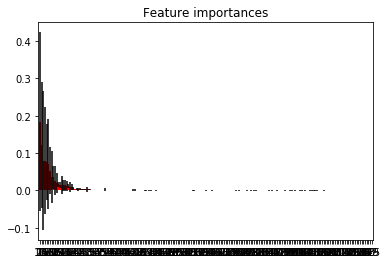

In [19]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Feature ranking:
1. feature 16 (0.184395)
2. feature 24 (0.120811)
3. feature 15 (0.079757)
4. feature 166 (0.079715)
5. feature 151 (0.076947)
6. feature 181 (0.071958)

In [20]:
y2015.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=103)

In [72]:
# What do we have here, anyway?
column_names = y2015.dtypes
print(column_names)

id                                float64
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
purpose                            object
title                              object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                          

In [22]:
smaller_df = y2015[['id','purpose','pub_rec','pymnt_plan','loan_status']].copy()

In [23]:
# need to make loan_status categorical eventually?
smaller_df

,id,purpose,pub_rec,pymnt_plan,loan_status
0,68009401.0,credit_card,2.0,n,Current
1,68354783.0,credit_card,0.0,n,Current
2,68466916.0,debt_consolidation,0.0,n,Fully Paid
3,68466961.0,debt_consolidation,0.0,n,Current
4,68495092.0,debt_consolidation,1.0,n,Fully Paid
5,68506798.0,credit_card,0.0,n,Current
6,68566886.0,debt_consolidation,0.0,n,Current
7,68577849.0,debt_consolidation,0.0,n,Fully Paid
8,66310712.0,debt_consolidation,0.0,n,Current
9,68476807.0,major_purchase,0.0,n,Fully Paid


In [25]:
smaller_df.pub_rec.unique()

array([ 2.,  0.,  1.,  3.,  5.,  4., 11.,  7.,  6.,  9.,  8., 10., 23.,
       12., 15., 26., 17., 13., 28., 20., 86., 18., 21., 14., 16., 19.,
       49., 22.])

In [27]:
smaller_df.pymnt_plan.unique()

array(['n'], dtype=object)

In [30]:
# Try again, get inside the array
np.unique(smaller_df['pymnt_plan'])

array(['n'], dtype=object)

In [28]:
# But dump loan status anyway...
smaller_df.loan_status.unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

In [31]:
# Now trying this w/ the following features:
# 'id','purpose','pub_rec','pymnt_plan','loan_status'

In [32]:
# For kicks, try this again.
rfc_1 = ensemble.RandomForestClassifier()
X_1 = smaller_df.drop('loan_status', 1)
Y_1 = smaller_df['loan_status']
X_1 = pd.get_dummies(X_1)
X_1 = X_1.dropna(axis=1)

cross_val_score(rfc_1, X_1, Y_1, cv=10)


array([0.67877752, 0.22338581, 0.15587376, 0.13789746, 0.11835668,
       0.1173593 , 0.08715477, 0.09026574, 0.12211746, 0.24811191])

start: 10:58 am
stop: before 11:02 am
Hmnn... high first return, otherwise, garbage

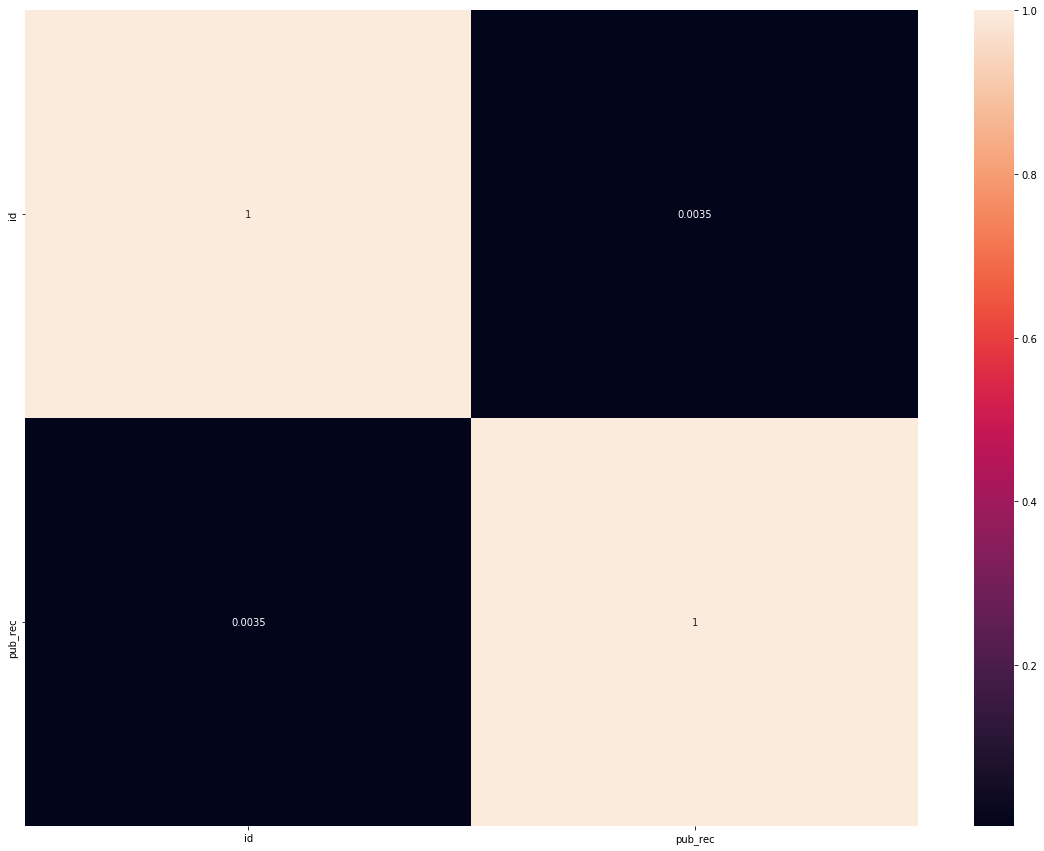

In [33]:
# run a correlation matrix and see where the correlations are 
plt.subplots(figsize=(20,15))
sns.heatmap(smaller_df.corr(), annot=True)

In [24]:
# Make categorical variables out of the most important features, run model again.
smaller_df.purpose.unique()

array(['credit_card', 'debt_consolidation', 'major_purchase',
       'home_improvement', 'small_business', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [ ]:
# Better make those categorical variables...
# Old Example
# data_raw['Murder_Cat'] = np.where((data_raw['Murder'] > 0),1,0)

>>> b, c = np.unique(a, return_inverse=True)
>>> b
array(['a', 'b', 'c'], 
      dtype='|S1')
>>> c
array([0, 1, 2, 0, 1, 2])
>>> c+1
array([1, 2, 3, 1, 2, 3])


In [35]:
purpose_int = np.unique(smaller_df['purpose'], return_inverse=True)


(array(['car', 'credit_card', 'debt_consolidation', 'educational',
        'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
        'other', 'renewable_energy', 'small_business', 'vacation',
        'wedding'], dtype=object), array([1, 1, 2, ..., 2, 2, 1]))

In [37]:
# This is the categorical array for purpose- 
purpose_int[1]

array([1, 1, 2, ..., 2, 2, 1])

In [38]:
payment_plan_int = np.unique(smaller_df['pymnt_plan'], return_inverse=True)

In [49]:
# Only one unique value???
smaller_df['pymnt_plan'].describe()

count     421095
unique         1
top            n
freq      421095
Name: pymnt_plan, dtype: object

In [47]:
np.unique(payment_plan_int[1])


array([0])

In [56]:
# id, purpose, pub_rec
# smaller_df = y2015[['id','purpose','pub_rec','pymnt_plan','loan_status']].copy()
even_smaller_df = y2015[['id','pub_rec','loan_status']].copy()

In [59]:
even_smaller_df['payment_plan_int'] = purpose_int[1]

In [60]:
even_smaller_df.head()

,id,pub_rec,loan_status,payment_plan_int
0,68009401.0,2.0,Current,1
1,68354783.0,0.0,Current,1
2,68466916.0,0.0,Fully Paid,2
3,68466961.0,0.0,Current,2
4,68495092.0,1.0,Fully Paid,2


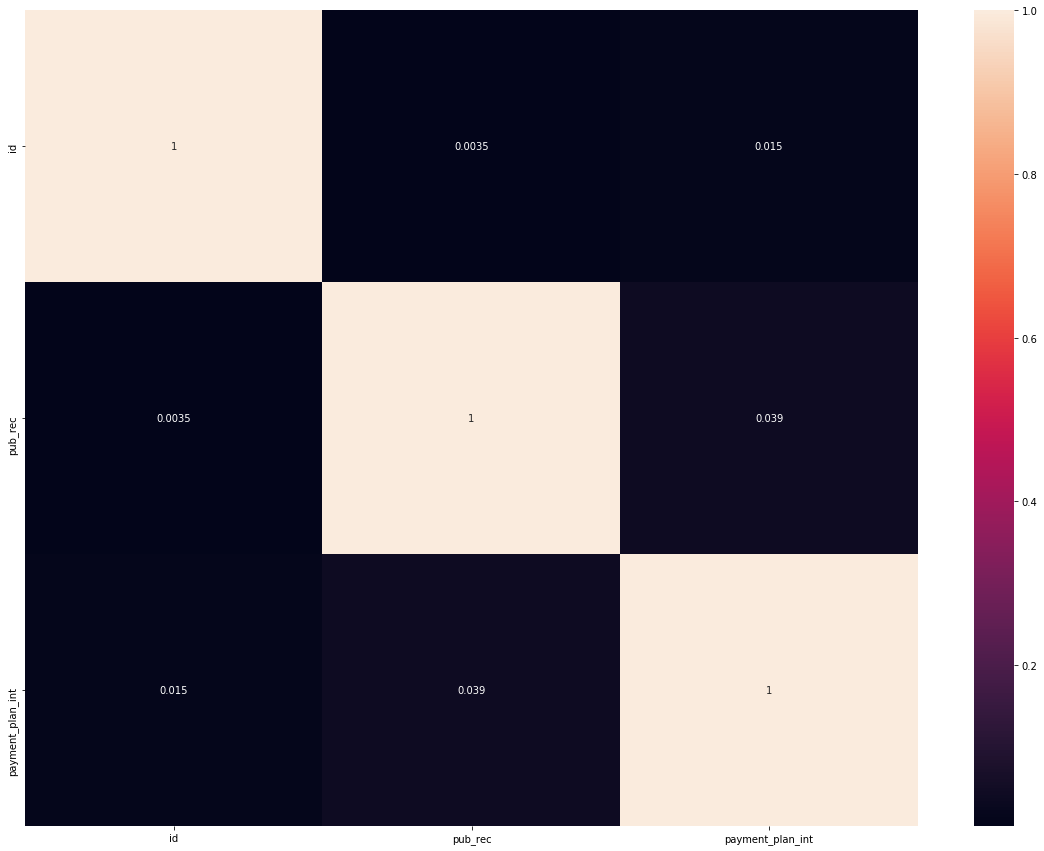

In [61]:
plt.subplots(figsize=(20,15))
sns.heatmap(even_smaller_df.corr(), annot=True)

In [62]:
# For kicks, try this again.
rfc_2 = ensemble.RandomForestClassifier()
X_2 = even_smaller_df.drop('loan_status', 1)
Y_2 = even_smaller_df['loan_status']
X_2 = pd.get_dummies(X_2)
X_2 = X_2.dropna(axis=1)

cross_val_score(rfc_2, X_2, Y_2, cv=10)


array([0.68119969, 0.22815891, 0.15675239, 0.13521408, 0.11937782,
       0.11614818, 0.0861811 , 0.09173811, 0.12202247, 0.24773191])

In [ ]:
# start at 12:21 pm
# stop at: 12:25 pm... these results aren't as good as the results I was getting with my medium_df. Why???

In [24]:
# ha... let's try for a medium sized dataframe...
medium_df = y2015[['funded_amnt','tot_cur_bal','installment','annual_inc','loan_status',
                   'delinq_2yrs','annual_inc_joint','mort_acc', 'pub_rec',
                  'num_rev_accts']].copy()

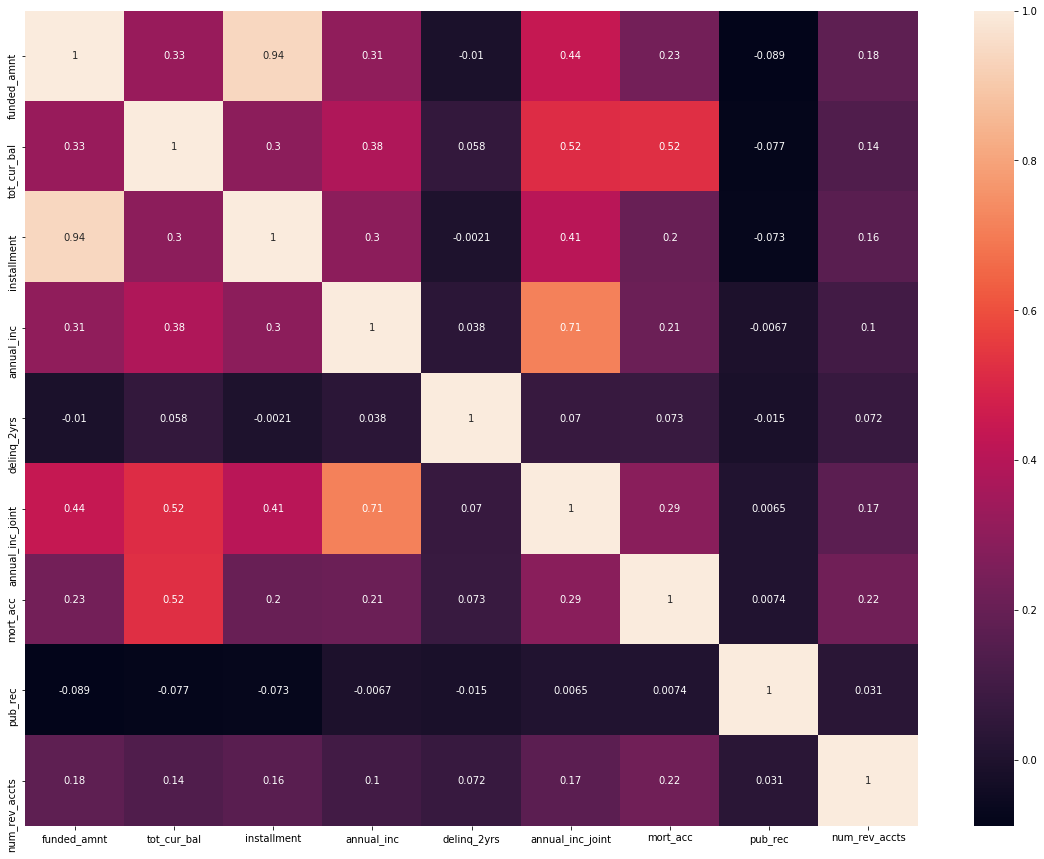

In [25]:
plt.subplots(figsize=(20,15))
sns.heatmap(medium_df.corr(), annot=True)

In [31]:
rfc_2 = ensemble.RandomForestClassifier(max_depth=10,n_estimators=10)
X_2 = medium_df.drop('loan_status', 1)
Y_2 = medium_df['loan_status']
X_2 = pd.get_dummies(X_2)
X_2 = X_2.dropna(axis=1)

In [32]:
rfc_2.fit(X_2,Y_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_2.score(X_2,Y_2)

0.6829836497702418

In [ ]:
# put a max depth into model

In [34]:
cross_val_score(rfc_2, X_2, Y_2, cv=10)

array([0.68226829, 0.68260075, 0.68243452, 0.68250576, 0.68230824,
       0.68242698, 0.6823007 , 0.68244318, 0.68249935, 0.68246806])